In [1]:
import pandas as pd
import numpy as np
import random
import re
import nltk
from pprint import pprint
from nltk.corpus import stopwords
from nltk import word_tokenize
import pymorphy3
from string import punctuation
from string import digits
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pymystem3 import Mystem
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import time, psutil, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from gensim.models import KeyedVectors
russian_stopwords = stopwords.words("russian")
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout, Input, BatchNormalization, SimpleRNN, Bidirectional
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
new_words=('фото', 'splash', 'news/all', 'over', 'press', 'globallookpress', 'photographer')

In [3]:
random.seed(2020)

In [4]:
df = pd.read_csv('sport_and_nauka_and_showbiz_full_dataset_1095_shuffle_new.csv')

In [5]:
df

,URL,Text,Title,Class
0,https://7days.ru/news/ego-razvedut-na-bablo-bi...,"Диме Билану декабре исполнится 40 лет, он до с...",«Его разведут на бабло»: Билана после свадьбы ...,ШОУ-БИЗНЕС СЛУХИ
1,https://argumenti.ru/showbiz/2020/04/660300,Известная актриса Светлана Ходченкова поделила...,Ходченкова покорила поклонников в элегантном н...,ШОУ-БИЗНЕС
2,https://7days.ru/news/brosil-zhenu-kutsenko-po...,Гоша Куценко накануне посетил премьеру фильма ...,Бросил жену? Куценко появился на публике с бер...,ШОУ-БИЗНЕС СЛУХИ
3,https://7days.ru/news/o-sostoyanii-docheri-uit...,"Дочь Уитни Хьюстон, Бобби Кристина Браун была ...",О состоянии дочери Уитни Хьюстон поступают про...,ШОУ-БИЗНЕС СЛУХИ
4,https://argumenti.ru/science/2017/01/518254,"Важное открытие сделали ученые, представляющие...","Ученые рассказали, когда человек начинает стареть",НАУКА СЛУХИ
...,...,...,...,...
6565,https://7days.ru/news/zakon-on-ne-narushal-pri...,Даня Милохин около недели назад предпринял поп...,«Закон он не нарушал»: приемный отец рассказал...,ШОУ-БИЗНЕС СЛУХИ
6566,https://argumenti.ru/science/2016/08/463230,Позитивный настрой просто хорошее настроение ч...,Позитивный подход усиливает эффективность спор...,НАУКА СЛУХИ
6567,https://argumenti.ru/science/2019/12/643864,Ученые из Гронингенского университета провели ...,Ученые предрекли Европе сильное похолодание в ...,НАУКА СЛУХИ
6568,https://www.sports.ru/football/1110514050-rubi...,Защитник Монтассар Тальби покинул «Рубин» прод...,«Рубин» продал Тальби «Лорьяну». Защитник сбор...,СПОРТ


In [6]:
encoder = LabelEncoder()

In [7]:
df['ClassEncoded'] = encoder.fit_transform(df['Class'])

In [8]:
df['Text'] = df['Text'].str.slice(0,1350)

In [9]:
df['Text'] = df['Text'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [10]:
morph = pymorphy3.MorphAnalyzer()

In [11]:
def process(text):
    return list(t.lower() for t in nltk.word_tokenize(text) if t.lower() not in new_words)

In [12]:
data = [process(t) for t in df['Text'][:]]

In [13]:
data[0]

['диме',
 'билану',
 'декабре',
 'исполнится',
 '40',
 'лет',
 ',',
 'он',
 'до',
 'сих',
 'пор',
 'ни',
 'разу',
 'не',
 'был',
 'женат',
 '.',
 'сначала',
 'ему',
 'было',
 'не',
 'до',
 'этого',
 'певец',
 'строил',
 'карьеру',
 'был',
 'сосредоточен',
 'на',
 'работе',
 '.',
 'сейчас',
 'же',
 'жизни',
 'артиста',
 ',',
 'как',
 'говорят',
 ',',
 'многое',
 'изменилось',
 '.',
 'он',
 'якобы',
 'живет',
 'некой',
 'аленой',
 'усачевой',
 ',',
 'одной',
 'из',
 'его',
 'фанаток',
 '.',
 'говорят',
 ',',
 'что',
 'билан',
 'даже',
 'собирается',
 'сделать',
 'ей',
 'предложение',
 ',',
 'однако',
 'против',
 'свадьбы',
 'выступает',
 'яна',
 'рудковская',
 '.',
 'светская',
 'львица',
 'считает',
 ',',
 'что',
 'женитьба',
 'может',
 'негативно',
 'сказать',
 'на',
 'творческих',
 'успехах',
 'билана',
 '.',
 'кроме',
 'того',
 ',',
 'она',
 'подозревает',
 ',',
 'что',
 'певца',
 'могут',
 'использовать',
 '.',
 'не',
 'секрет',
 ',',
 'что',
 'дима',
 'богатый',
 'человек',
 'его',

In [14]:
def lemmatizer(texts):
    return [[morph.parse(word)[0] for word in text] for text in texts]

In [15]:
morph_data = lemmatizer(data)

In [16]:
morph_data[0]

[Parse(word='диме', tag=OpencorporaTag('NOUN,anim,masc,Name sing,datv'), normal_form='дима', score=0.4, methods_stack=((DictionaryAnalyzer(), 'диме', 631, 2),)),
 Parse(word='билану', tag=OpencorporaTag('NOUN,anim,masc,Name sing,datv'), normal_form='билан', score=1.0, methods_stack=((DictionaryAnalyzer(), 'билану', 27, 2),)),
 Parse(word='декабре', tag=OpencorporaTag('NOUN,inan,masc sing,loct'), normal_form='декабрь', score=1.0, methods_stack=((DictionaryAnalyzer(), 'декабре', 195, 5),)),
 Parse(word='исполнится', tag=OpencorporaTag('VERB,perf,intr sing,3per,futr,indc'), normal_form='исполниться', score=1.0, methods_stack=((DictionaryAnalyzer(), 'исполнится', 652, 9),)),
 Parse(word='40', tag=OpencorporaTag('NUMB,intg'), normal_form='40', score=1.0, methods_stack=((NumberAnalyzer(score=0.9), '40'),)),
 Parse(word='лет', tag=OpencorporaTag('NOUN,inan,masc plur,gent'), normal_form='год', score=0.998492, methods_stack=((DictionaryAnalyzer(), 'лет', 1221, 11),)),
 Parse(word=',', tag=Openc

In [17]:
def extract_lemma(texts):
    norm = []
    for t in texts:
        res = []
        for word in t:
            n = word.normal_form
            res.append(n)
        norm.append(res)
    return norm

In [18]:
data_norm = extract_lemma(morph_data)

In [19]:
data_norm[0]

['дима',
 'билан',
 'декабрь',
 'исполниться',
 '40',
 'год',
 ',',
 'он',
 'до',
 'сей',
 'пора',
 'ни',
 'раз',
 'не',
 'быть',
 'женатый',
 '.',
 'сначала',
 'он',
 'быть',
 'не',
 'до',
 'это',
 'певец',
 'строить',
 'карьера',
 'быть',
 'сосредоточить',
 'на',
 'работа',
 '.',
 'сейчас',
 'же',
 'жизнь',
 'артист',
 ',',
 'как',
 'говорить',
 ',',
 'многое',
 'измениться',
 '.',
 'он',
 'якобы',
 'жить',
 'некий',
 'алёна',
 'усачёв',
 ',',
 'один',
 'из',
 'он',
 'фанатка',
 '.',
 'говорить',
 ',',
 'что',
 'билан',
 'даже',
 'собираться',
 'сделать',
 'она',
 'предложение',
 ',',
 'однако',
 'против',
 'свадьба',
 'выступать',
 'ян',
 'рудковский',
 '.',
 'светский',
 'львица',
 'считать',
 ',',
 'что',
 'женитьба',
 'мочь',
 'негативно',
 'сказать',
 'на',
 'творческий',
 'успех',
 'билан',
 '.',
 'кроме',
 'тот',
 ',',
 'она',
 'подозревать',
 ',',
 'что',
 'певец',
 'мочь',
 'использовать',
 '.',
 'не',
 'секрет',
 ',',
 'что',
 'дима',
 'богатый',
 'человек',
 'он',
 'деньга

In [20]:
data_norm = [w for w in data_norm if not w in new_words]

In [21]:
data_norm[0]

['дима',
 'билан',
 'декабрь',
 'исполниться',
 '40',
 'год',
 ',',
 'он',
 'до',
 'сей',
 'пора',
 'ни',
 'раз',
 'не',
 'быть',
 'женатый',
 '.',
 'сначала',
 'он',
 'быть',
 'не',
 'до',
 'это',
 'певец',
 'строить',
 'карьера',
 'быть',
 'сосредоточить',
 'на',
 'работа',
 '.',
 'сейчас',
 'же',
 'жизнь',
 'артист',
 ',',
 'как',
 'говорить',
 ',',
 'многое',
 'измениться',
 '.',
 'он',
 'якобы',
 'жить',
 'некий',
 'алёна',
 'усачёв',
 ',',
 'один',
 'из',
 'он',
 'фанатка',
 '.',
 'говорить',
 ',',
 'что',
 'билан',
 'даже',
 'собираться',
 'сделать',
 'она',
 'предложение',
 ',',
 'однако',
 'против',
 'свадьба',
 'выступать',
 'ян',
 'рудковский',
 '.',
 'светский',
 'львица',
 'считать',
 ',',
 'что',
 'женитьба',
 'мочь',
 'негативно',
 'сказать',
 'на',
 'творческий',
 'успех',
 'билан',
 '.',
 'кроме',
 'тот',
 ',',
 'она',
 'подозревать',
 ',',
 'что',
 'певец',
 'мочь',
 'использовать',
 '.',
 'не',
 'секрет',
 ',',
 'что',
 'дима',
 'богатый',
 'человек',
 'он',
 'деньга

In [22]:
len(data_norm[0])

232

In [23]:
max_len_data = 0
for i in range(len(data_norm)):
    if len(data_norm[i]) > max_len_data:
        max_len_data = len(data_norm[i])

In [24]:
max_len_data

280

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, df['ClassEncoded'], random_state = 2020, test_size = 0.2)

In [26]:
#ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=6, dtype = 'int32')
#ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=6, dtype = 'int32')

In [27]:
#X_train = [str (item) for item in X_train]

In [28]:
#X_test = [str (item) for item in X_test]

In [29]:
#TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
#X_train_tfidf = TfidfVec.fit_transform(X_train)
#X_test_tfidf = TfidfVec.transform(X_test)

In [30]:
le = LabelEncoder()
y_train_number = le.fit_transform(y_train)
y_test_number = le.fit_transform(y_test)

In [31]:
y_train_number

array([1, 4, 5, ..., 0, 0, 5], dtype=int64)

In [32]:
dict_train = {'tokens': X_train, 'label': y_train_number} 

In [33]:
data_train = pd.DataFrame(dict_train)

In [34]:
dict_test = {'tokens': X_test, 'label': y_test_number} 

In [35]:
data_test = pd.DataFrame(dict_test)

In [36]:
token = text.Tokenizer(num_words=None)

In [37]:
token.fit_on_texts(list(X_train) + list(X_test))

In [38]:
xtrain_seq = token.texts_to_sequences(X_train)

In [39]:
xtest_seq = token.texts_to_sequences(X_test)

In [40]:
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len_data)

In [41]:
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len_data)

In [42]:
word_index = token.word_index

In [43]:
embeddings_index = {}
f = open('word2vecsg100','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

9414it [00:01, 8991.66it/s]

Found 9414 word vectors.


In [44]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 34428/34428 [00:00<00:00, 1046577.26it/s]


In [45]:
#word2vec = KeyedVectors.load_word2vec_format("word2veccbow")

In [46]:
#word2vec_len = len(word2vec)

In [47]:
#word2vec_len

In [48]:
#X_train_embed = get_word2vec_embeddings(word2vec, data_train['tokens'])
#X_test_embed = get_word2vec_embeddings(word2vec, data_test['tokens'])

#fig = plt.figure(figsize = (8, 7))          
#plot_embedding(X_train_embed, y_train_number)
#plt.show()

In [49]:
#X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
#X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

In [50]:
#X_train_w2v.shape

In [51]:
#X_train_w2v = tf.expand_dims(X_train_embed, axis=-1)
#X_test_w2v = tf.expand_dims(X_test_embed, axis=-1)

In [52]:
#X_train_w2v.shape

In [53]:
def build_lstm_model(embedding_matrix, max_sequence_length):
    # Input layer
    input_layer = Input(shape=(max_sequence_length,), dtype='int32')
    
    # Word embedding layer
    embedding_layer = Embedding(input_dim=34428+1,
                                output_dim=300,
                                weights=[embedding_matrix],
                                input_length=max_sequence_length,
                                trainable=True)(input_layer)
    
    # LSTM model layer
    lstm_layer = SimpleRNN(units=128,
                      dropout=0.5,
                      return_sequences=False)(embedding_layer)
    batch_normalization = BatchNormalization()(lstm_layer)
    '''
    lstm_layer = LSTM(units=128,
                      dropout=0.5,
                      return_sequences=False)(batch_normalization)
    batch_normalization = BatchNormalization()(lstm_layer)
    '''
    # Dense model layer
    dense_layer = Dense(units=128, activation='relu')(batch_normalization)
    dropout_layer = Dropout(rate=0.5)(dense_layer)
    batch_normalization = BatchNormalization()(dropout_layer)
    
    output_layer = Dense(units=6, activation='softmax')(batch_normalization)

    lstm_model = Model(inputs=input_layer, outputs=output_layer)

    return lstm_model

In [54]:
lstm_model = build_lstm_model(embedding_matrix, max_len_data)

In [55]:
lstm_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 280)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 280, 300)          10328700  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               54912     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512   

In [56]:
lstm_model.compile(loss='sparse_categorical_crossentropy',
                               optimizer=Adam(learning_rate=0.001),
                               metrics=['accuracy'])

In [57]:
callbacks = [EarlyStopping(monitor='val_loss', patience=7),
         ModelCheckpoint(filepath='sg_100_rnn.h5', monitor='val_loss', save_best_only=True)]

In [58]:
lstm_history = lstm_model.fit(xtrain_pad,y_train_number,validation_data=(xtest_pad,y_test_number),epochs=20,callbacks=callbacks,batch_size=256)

Epoch 1/20
21/21 [==============================] - 41s 1s/step - loss: 2.0439 - accuracy: 0.2553 - val_loss: 1.7003 - val_accuracy: 0.2938
Epoch 2/20
21/21 [==============================] - 29s 1s/step - loss: 1.3382 - accuracy: 0.4315 - val_loss: 1.0501 - val_accuracy: 0.4802
Epoch 3/20
21/21 [==============================] - 29s 1s/step - loss: 1.0070 - accuracy: 0.5103 - val_loss: 1.0022 - val_accuracy: 0.4878
Epoch 4/20
21/21 [==============================] - 29s 1s/step - loss: 0.9091 - accuracy: 0.5200 - val_loss: 0.7627 - val_accuracy: 0.5145
Epoch 5/20
21/21 [==============================] - 28s 1s/step - loss: 0.8654 - accuracy: 0.5346 - val_loss: 0.7337 - val_accuracy: 0.5274
Epoch 6/20
21/21 [==============================] - 28s 1s/step - loss: 0.8452 - accuracy: 0.5531 - val_loss: 0.8325 - val_accuracy: 0.5289
Epoch 7/20
21/21 [==============================] - 28s 1s/step - loss: 0.7642 - accuracy: 0.5826 - val_loss: 0.7457 - val_accuracy: 0.5320
Epoch 8/20
21/21 [==

In [59]:
history_dict = lstm_history.history

In [60]:
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

In [61]:
loss = history_dict['loss'] 
val_loss = history_dict['val_loss']

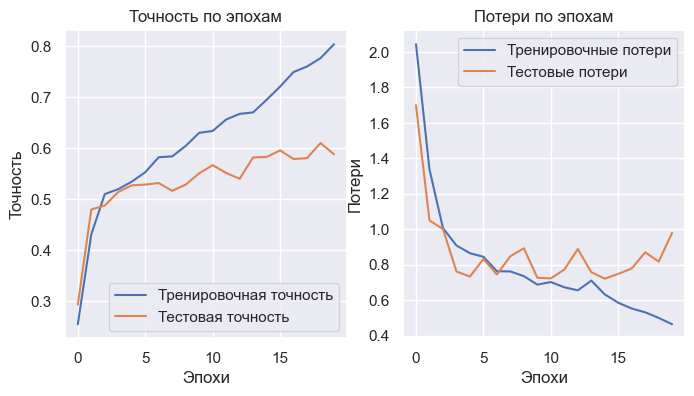

In [62]:
plt.figure(figsize=(8, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(acc) 
plt.plot(val_acc) 
plt.title('Точность по эпохам') 
plt.xlabel('Эпохи') 
plt.ylabel('Точность') 
plt.legend(['Тренировочная точность', 'Тестовая точность']) 
  
plt.subplot(1, 2, 2) 
plt.plot(loss) 
plt.plot(val_loss) 
plt.title('Потери по эпохам') 
plt.xlabel('Эпохи') 
plt.ylabel('Потери') 
plt.legend(['Тренировочные потери', 'Тестовые потери']) 
  
plt.show()

In [63]:
lstm_history.history

{'loss': [2.0438523292541504,
  1.3381977081298828,
  1.0070453882217407,
  0.9091064929962158,
  0.8654113411903381,
  0.8451847434043884,
  0.7642120718955994,
  0.7625985145568848,
  0.7359525561332703,
  0.6882905960083008,
  0.7027094960212708,
  0.6734057068824768,
  0.6559903621673584,
  0.7110394835472107,
  0.633317768573761,
  0.5861536264419556,
  0.5536020994186401,
  0.5319898724555969,
  0.5005307793617249,
  0.46481388807296753],
 'accuracy': [0.2553272545337677,
  0.43150684237480164,
  0.5102739930152893,
  0.5199771523475647,
  0.5346270799636841,
  0.5530821681022644,
  0.5825722813606262,
  0.5840943455696106,
  0.6046423316001892,
  0.6303272247314453,
  0.633942186832428,
  0.6563926935195923,
  0.6674277186393738,
  0.6702815890312195,
  0.6950151920318604,
  0.7208904027938843,
  0.7494292259216309,
  0.7602739930152893,
  0.7766362428665161,
  0.8038432002067566],
 'val_loss': [1.700300693511963,
  1.0500755310058594,
  1.0022085905075073,
  0.762665331363678,


In [64]:
val_acc

[0.2937595248222351,
 0.48021307587623596,
 0.4878234267234802,
 0.5144596695899963,
 0.5273972749710083,
 0.5289193391799927,
 0.5319634675979614,
 0.5167427659034729,
 0.5289193391799927,
 0.5509893298149109,
 0.5669710636138916,
 0.5517503619194031,
 0.5403348803520203,
 0.5821917653083801,
 0.5829527974128723,
 0.5958904027938843,
 0.5791476368904114,
 0.5806697010993958,
 0.6103500723838806,
 0.5882800817489624]

In [65]:
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = ['Наука', 'Наук. слухи', 'Спорт', 'Спорт слухи', 'Шоу-биз', 'Шоу. слухи']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(6), range(6))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale)
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd')
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

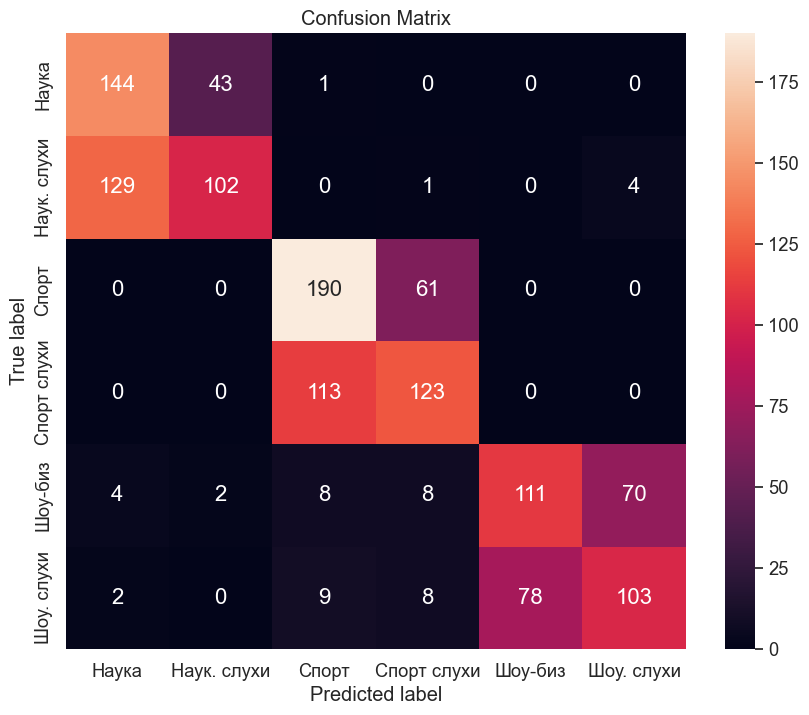

In [66]:
y_pred=lstm_model.predict(xtest_pad) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test_number, axis=0)

#y_test_pred = lstm_model.predict(xtest_pad)
#score_test = accuracy_score(y_test_number, y_test_pred)
#print(pd.Series({"Test accuracy": score_test}).to_string())
#print(" ")
conf_mat(y_test_number, y_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16)